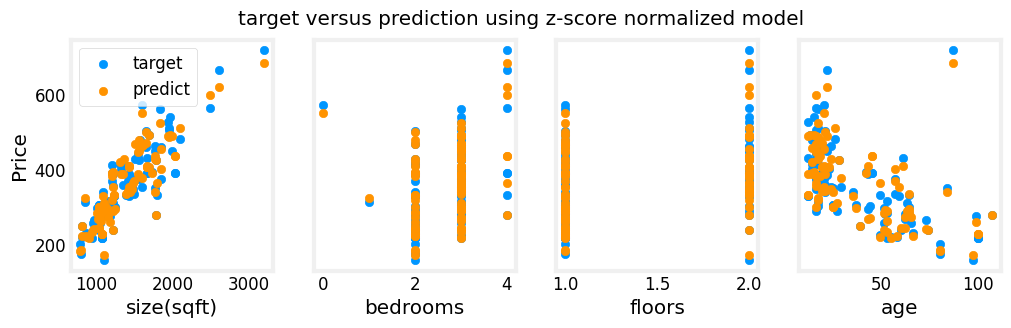

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import sys

sys.path.append('..')

from scripts.utils import dlc, load_house_data


np.set_printoptions(precision=2)
plt.style.use('../styles/basic.mplstyle')

x_features = ['size(sqft)','bedrooms','floors','age']
y_train = np.load("../data/processed/house_y_train.npy")
x_train = np.load("../data/processed/house_x_train.npy")
x_norm = np.load("../data/processed/house_x_norm.npy")

with open('../models/linear_regression_sgd.pkl', 'rb') as f:
    sgdr_loaded = pickle.load(f)

# Use the loaded model to predict
y_pred_sgd = sgdr_loaded.predict(x_norm)


fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)

for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(x_features[i])
    ax[i].scatter(x_train[:,i],y_pred_sgd,color=dlc["dlorange"], label = 'predict')

ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")

plt.show()